In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

from eddies_detection import  get_traj_with_parcels, get_traj_with_numpy, find_eddies
from eddies_tracking import eddies_tracker
from catalog import write_catalog
from plot import StreamPlot
from time import time
import numpy as np

d0 = 0
date_len = 3
stream_data_fname = "../data/data.nc"
runtime = 600
delta_time = 5
particle_grid_step = 6

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

## Compute the list of path

In [3]:
list_days = []

for di in range(date_len):
    print(di)
    t0 = time()
    b = get_traj_with_numpy(d0+di, runtime, delta_time, particle_grid_step, stream_data_fname)
    print("Time : ",time()-t0)
    
    bb = find_eddies(b)
    list_days.append(bb)

0
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  6.926361560821533
1
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  6.615829706192017
2
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  6.315474987030029


In [4]:
import random as rd

rd_color = lambda: '#{:02x}{:02x}{:02x}'.format(rd.randint(0,255),rd.randint(0,255),rd.randint(0,255))

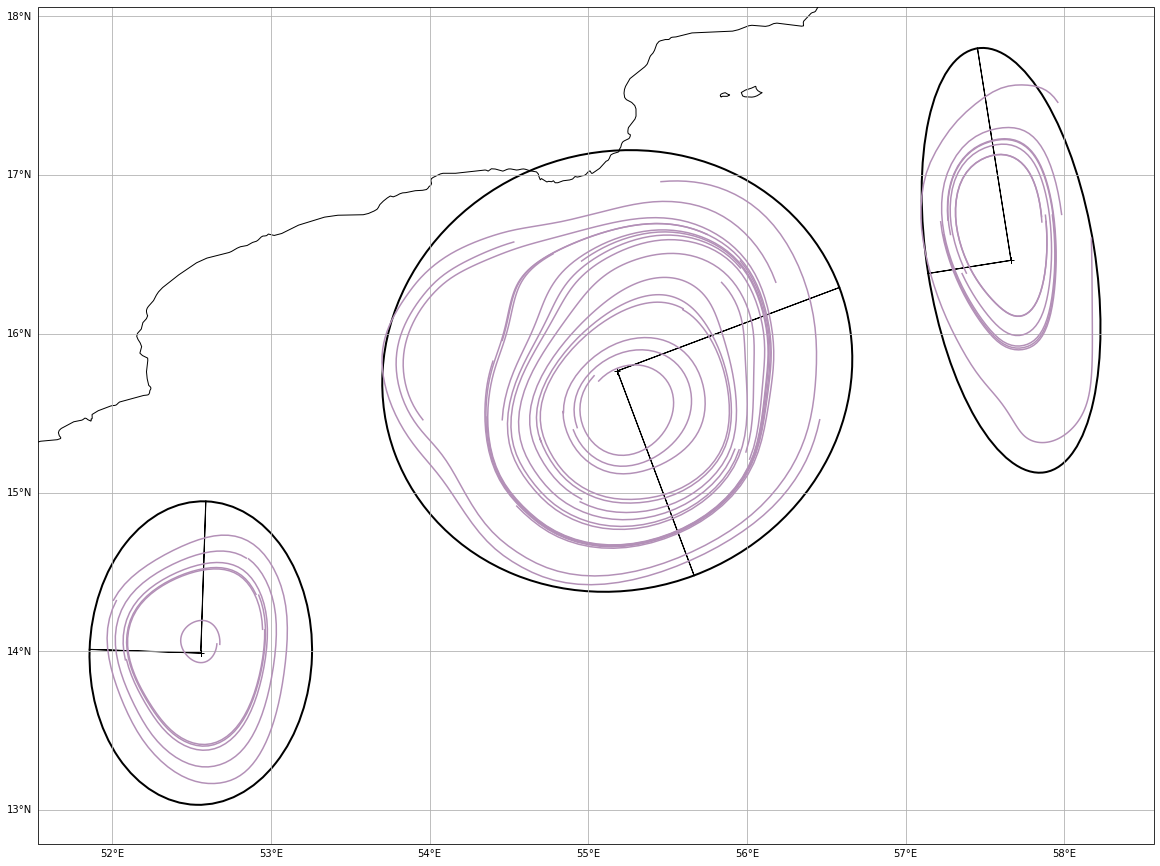

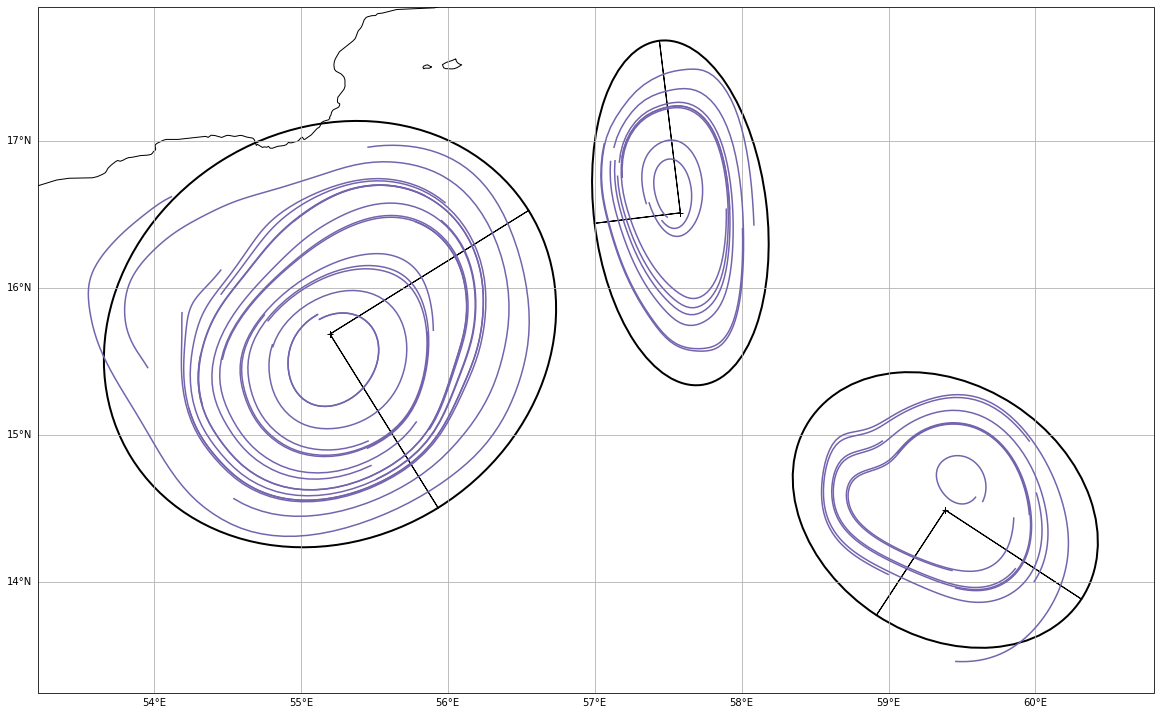

In [5]:
for bb in list_days[:2]:
    figure = StreamPlot()
    line_style = rd_color()
    figure.plot_eddies(bb,line_style=line_style)
    figure.show()

## Clustering

In [6]:
date_len = date_len
t0 = time()
paths = eddies_tracker(0,list_days[:date_len],nb_prev_day=8)
print("Time : ",time()-t0)

Time :  0.22981500625610352


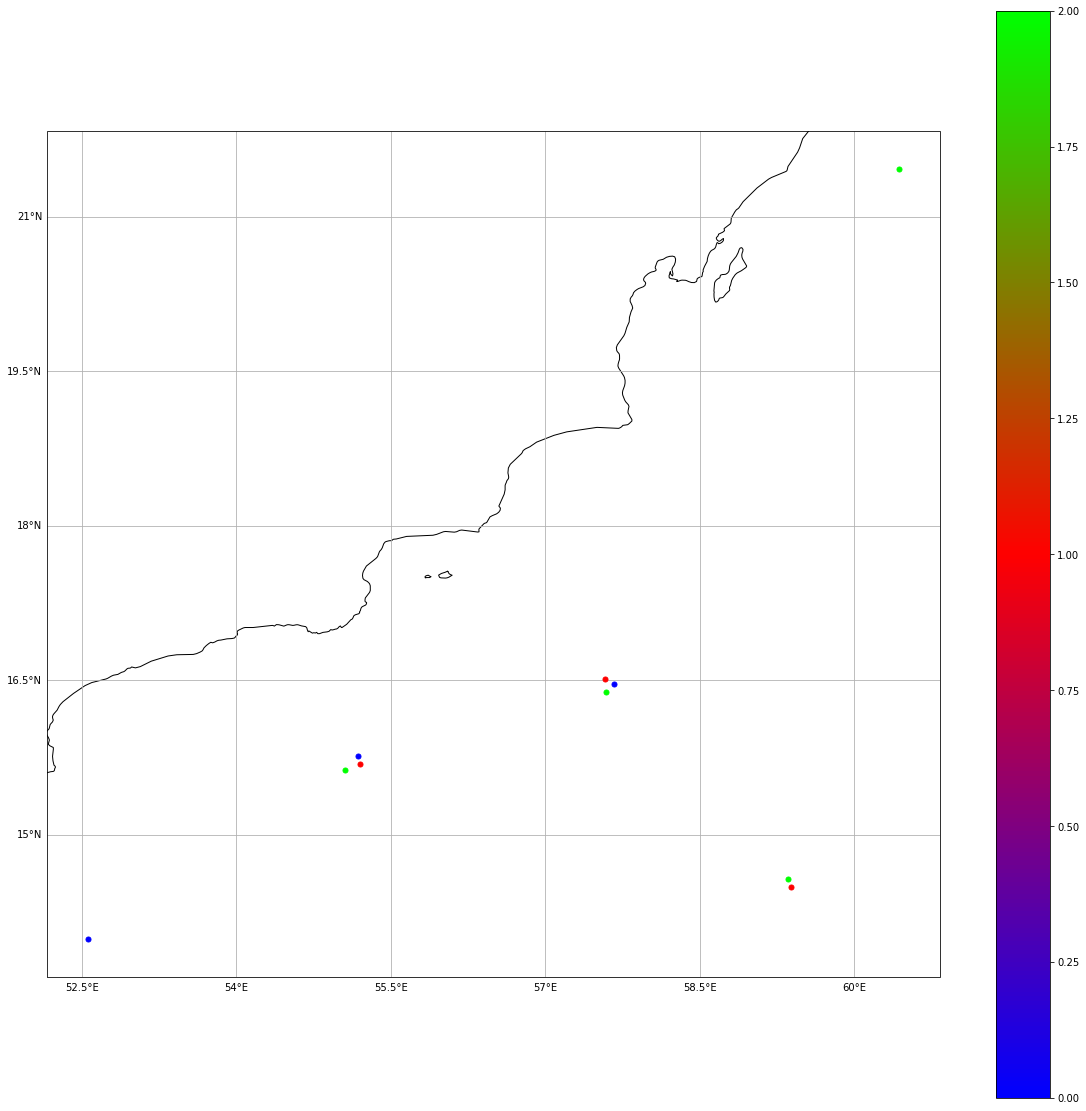

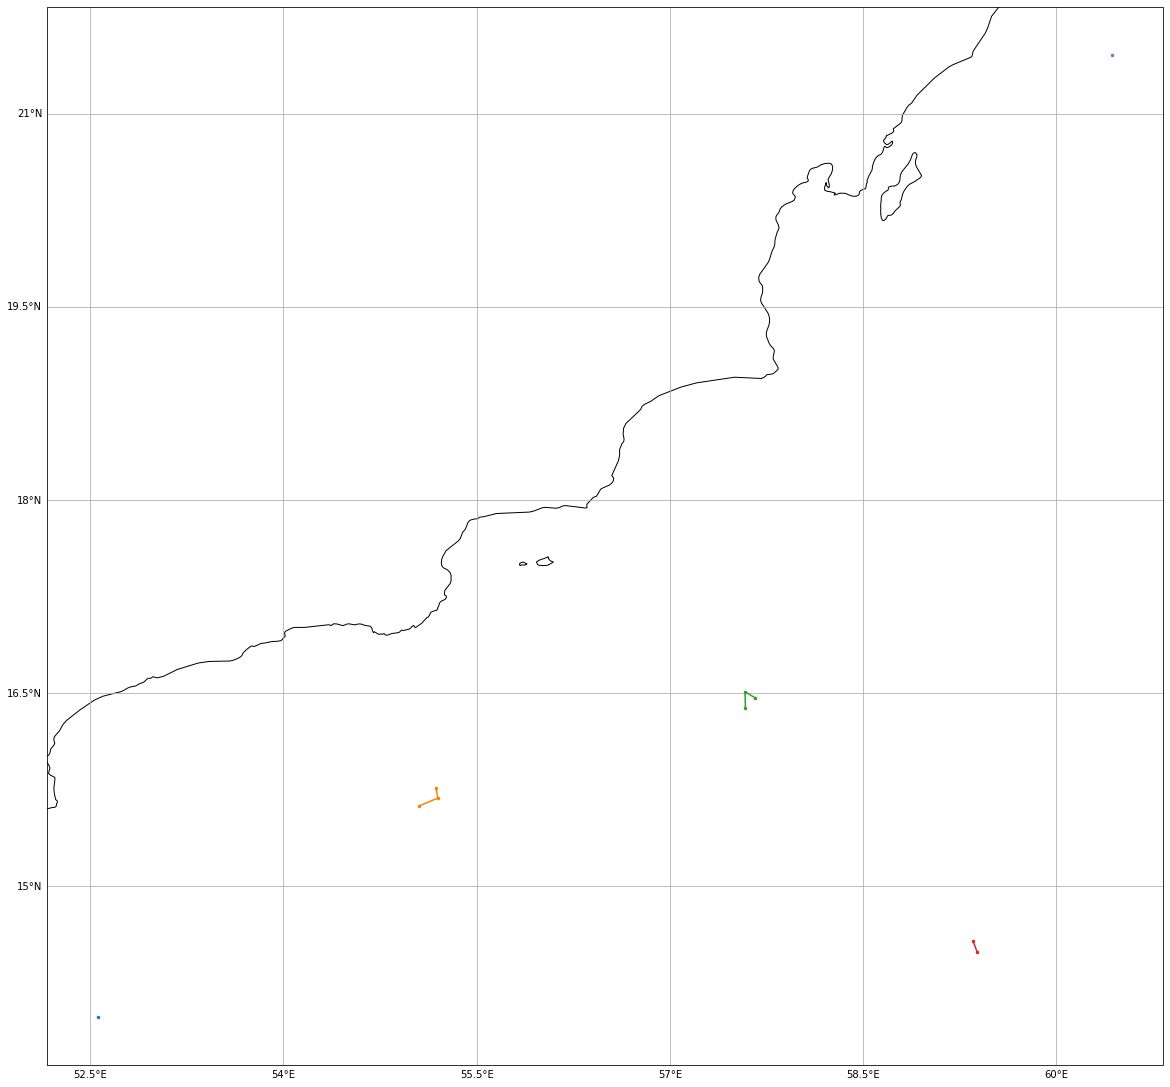

In [7]:
figure = StreamPlot()
figure.plot_catalogue(paths)
figure.show()

figure = StreamPlot()
figure.plot_eddies_trajectories(paths)
figure.show()

In [8]:
df = write_catalog(paths,fname='catalog.csv')

In [9]:
df

,date,id,center_x,center_y,a,b,angle,omega
0,0,0,52.559139,13.988449,0.467102,0.637497,3.108506,0.000005
1,0,1,55.182947,15.765710,0.996490,0.917343,0.359370,-0.000003
2,0,2,57.663832,16.462744,0.352356,0.901428,-2.984302,0.000004
3,1,1,55.198971,15.686171,1.061340,0.928108,0.556703,-0.000004
4,1,2,57.583567,16.511366,0.392029,0.786621,-3.020211,0.000005
5,1,3,59.386459,14.489198,0.738216,0.570225,-0.579537,0.000003
6,2,1,55.053229,15.625271,1.156326,0.942291,0.322667,-0.000004
7,2,2,57.586426,16.387943,0.456913,0.942474,-3.020950,0.000004
8,2,3,59.354583,14.573905,0.642380,0.528778,-0.608027,0.000003
9,2,4,60.436545,21.456977,0.347397,0.683502,2.571320,0.000004
